# 🦦 HD-DOTTER PIPELINE

<img src="../imgs/hddotter_logo.png" width="650">

## 📦 Import packages

In [58]:
# Get MNE, a python package for brain data analysis
import mne                          # general MNE functions
import mne_nirs                     # specific for NIRS
from mne.viz import set_3d_view     # for 3D plotting
import nibabel as nib               # for handling nifti files
import pyvista as pv                # for 3D plotting ply files (as meshes)

# Handling hdf5-like files
import h5py                         # for handling hdf5 files (generic)
import snirf                        # for handling snirf files (specific for NIRS)

# For testing purposes only
from mne.datasets.testing import data_path 

# Matrix (array) operations
import numpy as np                  # pronounce it "noom-pee" because it's cuter                 

# Some other useful packages
import os.path as op                # for file path operations
import darkdetect                   # adjusts the plots to dark mode if needed
import matplotlib.pyplot as plt     # for general plotting if needed
import os                           # for general file operations

## 💿 Load the data

### 🧪 Test data
Uncomment the cell below to run.

In [59]:
'''testing_path = data_path(download=True)
fname = op.join(testing_path, 'SNIRF', 'GowerLabs', 'lumomat-1-1-0.snirf')
raw = mne.io.read_raw_snirf(fname, preload=True)'''

"testing_path = data_path(download=True)\nfname = op.join(testing_path, 'SNIRF', 'GowerLabs', 'lumomat-1-1-0.snirf')\nraw = mne.io.read_raw_snirf(fname, preload=True)"

### 📋 Fill in some experiment data

In [60]:
# Who participated in the experiment? (Works for both species.)
subject = 'odin'

# Whose template should we use? (odin, barney, kunkun) 
# Works with dogs only. For humans, define template on the go!
template_name = 'odin'

## ፨ SNIRF data
<span style="color:orange">Important:</span> Lumo provides data in .lufr format. First you need to convert it to .snirf in Matlab using the lufr_converter.m script.

In [61]:
# Path to the data (Do not touch)
snirf_path = '../data/do_not_touch/snirf/' + subject + '.snirf'

# This reads the data and displays the main information (Do not touch)
raw = mne.io.read_raw_snirf(snirf_path, preload=True)
raw

Loading /home/rblc/ELTE/hddotter/scripts/../data/do_not_touch/snirf/odin.snirf
Reading 0 ... 1892  =      0.000 ...   151.360 secs...


/tmp/ipykernel_18373/3538008987.py:5: RuntimeWarning: Extraction of measurement date from SNIRF file failed. The date is being set to January 1st, 2000, instead of unknownunknown
  raw = mne.io.read_raw_snirf(snirf_path, preload=True)


<RawSNIRF | odin.snirf, 3456 x 1893 (151.4 s), ~52.6 MB, data loaded>

<span style="color:yellow">REMOVE CELL BELOW! DEVELOPMENT ONLY</span>

In [62]:
subjects_dir = op.join(mne.datasets.sample.data_path(), 'subjects')
mne.datasets.fetch_fsaverage(subjects_dir=subjects_dir)

brain = mne.viz.Brain('fsaverage', subjects_dir=subjects_dir, alpha=0.0, cortex='low_contrast', background="w")
brain.add_sensors(raw.info, trans='fsaverage', fnirs=["sources", "detectors"])
brain.show_view(azimuth=130, elevation=80, distance=700)

0 files missing from root.txt in /home/rblc/mne_data/MNE-sample-data/subjects
0 files missing from bem.txt in /home/rblc/mne_data/MNE-sample-data/subjects/fsaverage
To use light mode, "qdarkstyle" has to be installed! You can install it with:
pip install qdarkstyle

To use light mode, "qdarkstyle" has to be installed! You can install it with:
pip install qdarkstyle

Channel types::	fnirs_cw_amplitude: 3456


In [63]:
raw.get_data().shape

(3456, 1893)

Let's make a rough plot. 

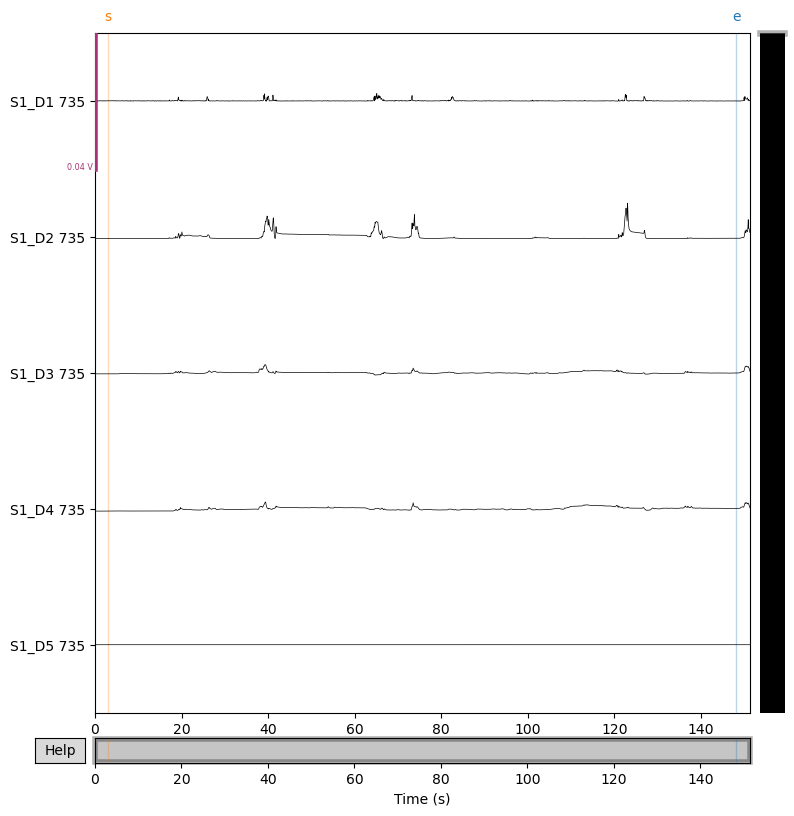

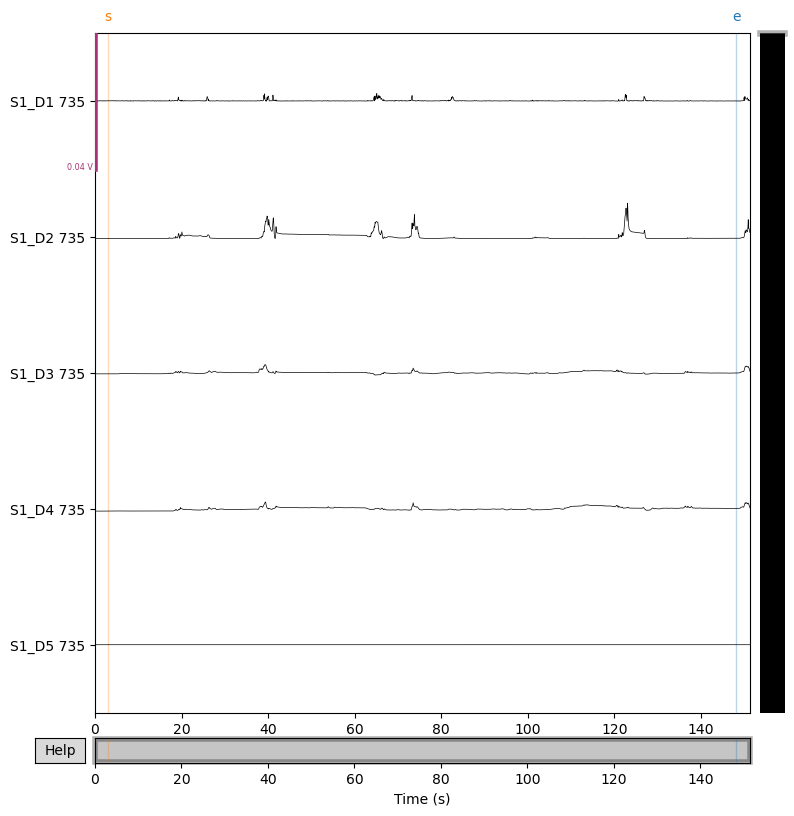

In [64]:
raw.plot(duration=600,          # Set it longer than the measurement, so you see all.
        n_channels=5,           # Look at the first 5 channels only.
        remove_dc=True)         # Remove the DC component from the data.

Check what annotations are in the file.

In [65]:
raw_annotations = raw.annotations.to_data_frame()
raw_annotations

,onset,duration,description
0,2000-01-01 00:00:03.000,0.0,s
1,2000-01-01 00:02:28.137,0.0,e


<span style='color:yellow'>Things to improve:</span>
- The interactive slider doesn't work in this notebook. Oh well.
- No clue what these codes are (eg. S1_D1).
- I only see the 735 nm channels. I assume the 850 would be below.
- No clue what the DC component removal does. I don't see any difference. 

## 🧭 Location
This whole section is for exploratory purposes only. Sensor coordinates and anatomical landmarks are added in Matlab using the /scripts/lufr_converter.m script.

### ⛔️ Channel locations 
I'm currently unsure what channel location coordinates represent exactly. I'm also unsure what the scale is (possibly meters).

In [66]:
for idx, ch in enumerate(raw.info['chs']):
    loc = ch['loc'][:3]                         # First three elements are the x, y, z coordinates
    print(f"Channel {idx}: Location - {loc}")

Channel 0: Location - [0.00725203 0.01353323 0.01329226]
Channel 1: Location - [0.00725203 0.01353323 0.01329226]
Channel 2: Location - [0.00725203 0.01353323 0.01329226]
Channel 3: Location - [0.00725203 0.01353323 0.01329226]
Channel 4: Location - [0.00493628 0.01384992 0.01276777]
Channel 5: Location - [0.00493628 0.01384992 0.01276777]
Channel 6: Location - [0.00493628 0.01384992 0.01276777]
Channel 7: Location - [0.00493628 0.01384992 0.01276777]
Channel 8: Location - [0.00367595 0.01219838 0.01242217]
Channel 9: Location - [0.00367595 0.01219838 0.01242217]
Channel 10: Location - [0.00367595 0.01219838 0.01242217]
Channel 11: Location - [0.00367595 0.01219838 0.01242217]
Channel 12: Location - [0.00564399 0.01203147 0.01383268]
Channel 13: Location - [0.00564399 0.01203147 0.01383268]
Channel 14: Location - [0.00564399 0.01203147 0.01383268]
Channel 15: Location - [0.00564399 0.01203147 0.01383268]
Channel 16: Location - [0.00797192 0.01176852 0.01376366]
Channel 17: Location - [

### 📡 Sensor location
Yes... it surely is stored somewhere.

### 💀 Anatomical landmarks

Digitization points (digs) are important anatomical landmark points. 

- **Nasion:** nasion
- **LPA:** left pre-aricular
- **RPA:** right pre-aricular
- **EEG #1:** Central zero (Cz)
- **EEG #2:**  Inion

In [67]:
# Stored anatomical landmarks (Digitization points)
raw.info['dig']

[<DigPoint |        LPA : (2.5, 98.8, 55.7) mm      : head frame>,
 <DigPoint |     Nasion : (52.4, 151.0, 94.5) mm    : head frame>,
 <DigPoint |        RPA : (114.8, 106.3, 81.2) mm   : head frame>,
 <DigPoint |     EEG #1 : (54.4, 49.4, 116.8) mm    : head frame>,
 <DigPoint |     EEG #2 : (53.4, 97.0, 122.6) mm    : head frame>]

### 𐄳 Display (existing) mesh
❗️ <span style='color:yellow'>This is to check the ply file of Odin. This was constructed by Raul.</span>
This is references data independent from this pipeline. 

/home/rblc/miniconda3/envs/env311/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


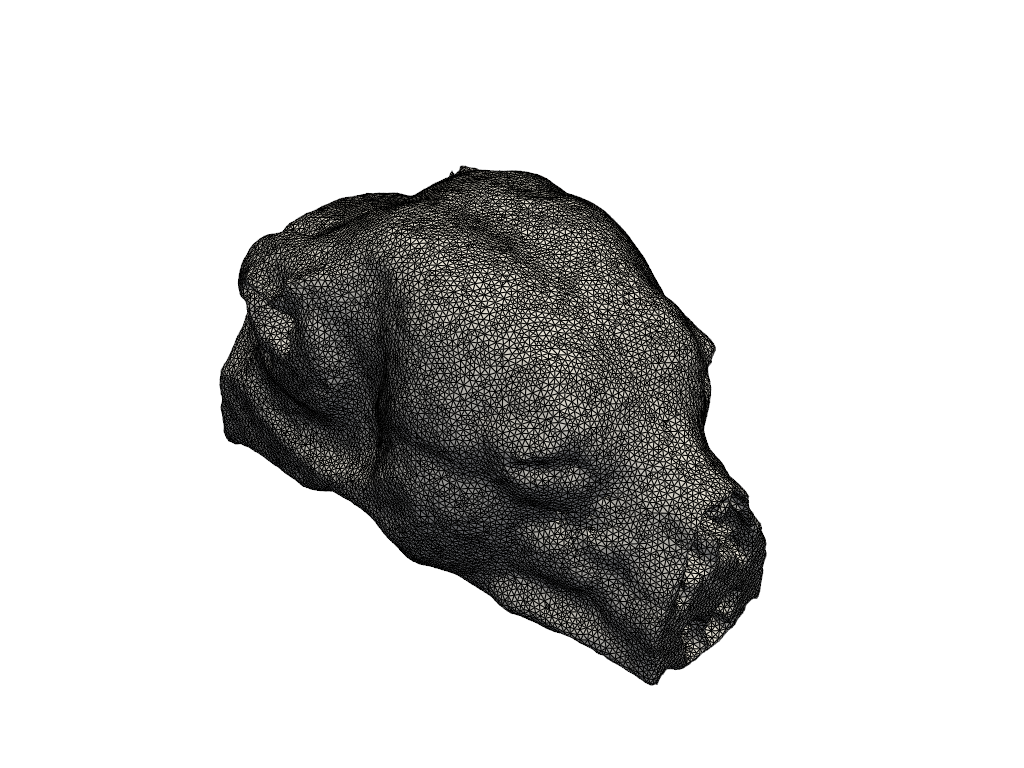

In [10]:
mesh = pv.read('../data/copy_raw_here/odin_mesh.ply')
plotter = pv.Plotter()
plotter.add_mesh(mesh, color='white', show_edges=True)
plotter.show()

### 🔪 Display segmented tissues
- **AIR:** I guess some air?
- **CSF:** Either canine science forum or cerebrospinal fluid. The latter is more likely.
- **GM:** Grey matter
- **SCALP:** Das ist ja aber selbstverständlich.
- **SKULL:** 💀
- **WM:** White matter.

In [11]:
# I didn't have Barney on my home computer, so uncomment it in the office
''' Load a NIfTI file
nifti_file = '../data/do_not_touch/templates/barney/barney.nii'
img = nib.load(nifti_file)

# Get the image data from the NIfTI file
data = img.get_fdata()

# Plotting
cmap = "inferno"
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(data[:, :, data.shape[2] // 2], cmap=cmap)
axes[1].imshow(data[:, data.shape[1] // 2, :], cmap=cmap)
axes[2].imshow(data[data.shape[0] // 2, :, :], cmap=cmap)

# Setting titles
axes[0].set_title('Sagittal')
axes[1].set_title('Coronal')
axes[2].set_title('Axial')

# Add an overall title
fig.suptitle('Template of Barney',
                fontsize=24)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()'''

' Load a NIfTI file\nnifti_file = \'../data/do_not_touch/templates/barney/barney.nii\'\nimg = nib.load(nifti_file)\n\n# Get the image data from the NIfTI file\ndata = img.get_fdata()\n\n# Plotting\ncmap = "inferno"\nfig, axes = plt.subplots(1, 3, figsize=(15, 5))\naxes[0].imshow(data[:, :, data.shape[2] // 2], cmap=cmap)\naxes[1].imshow(data[:, data.shape[1] // 2, :], cmap=cmap)\naxes[2].imshow(data[data.shape[0] // 2, :, :], cmap=cmap)\n\n# Setting titles\naxes[0].set_title(\'Sagittal\')\naxes[1].set_title(\'Coronal\')\naxes[2].set_title(\'Axial\')\n\n# Add an overall title\nfig.suptitle(\'Template of Barney\',\n                fontsize=24)\n\n# Adjust layout\nplt.tight_layout(rect=[0, 0.03, 1, 0.97])\nplt.show()'

In [14]:
# Load segmented nifti files
# Change nii.gz to nii if necessary (will be automated later)
nifti_path = '../data/do_not_touch/templates/' + template_name + '/'
air = nib.load(os.path.join(nifti_path, 'air.nii'))
csf = nib.load(os.path.join(nifti_path, 'csf.nii'))
gm = nib.load(os.path.join(nifti_path, 'gm.nii'))
scalp = nib.load(os.path.join(nifti_path, 'scalp.nii'))
skull = nib.load(os.path.join(nifti_path, 'skull.nii'))
wm = nib.load(os.path.join(nifti_path, 'wm.nii'))

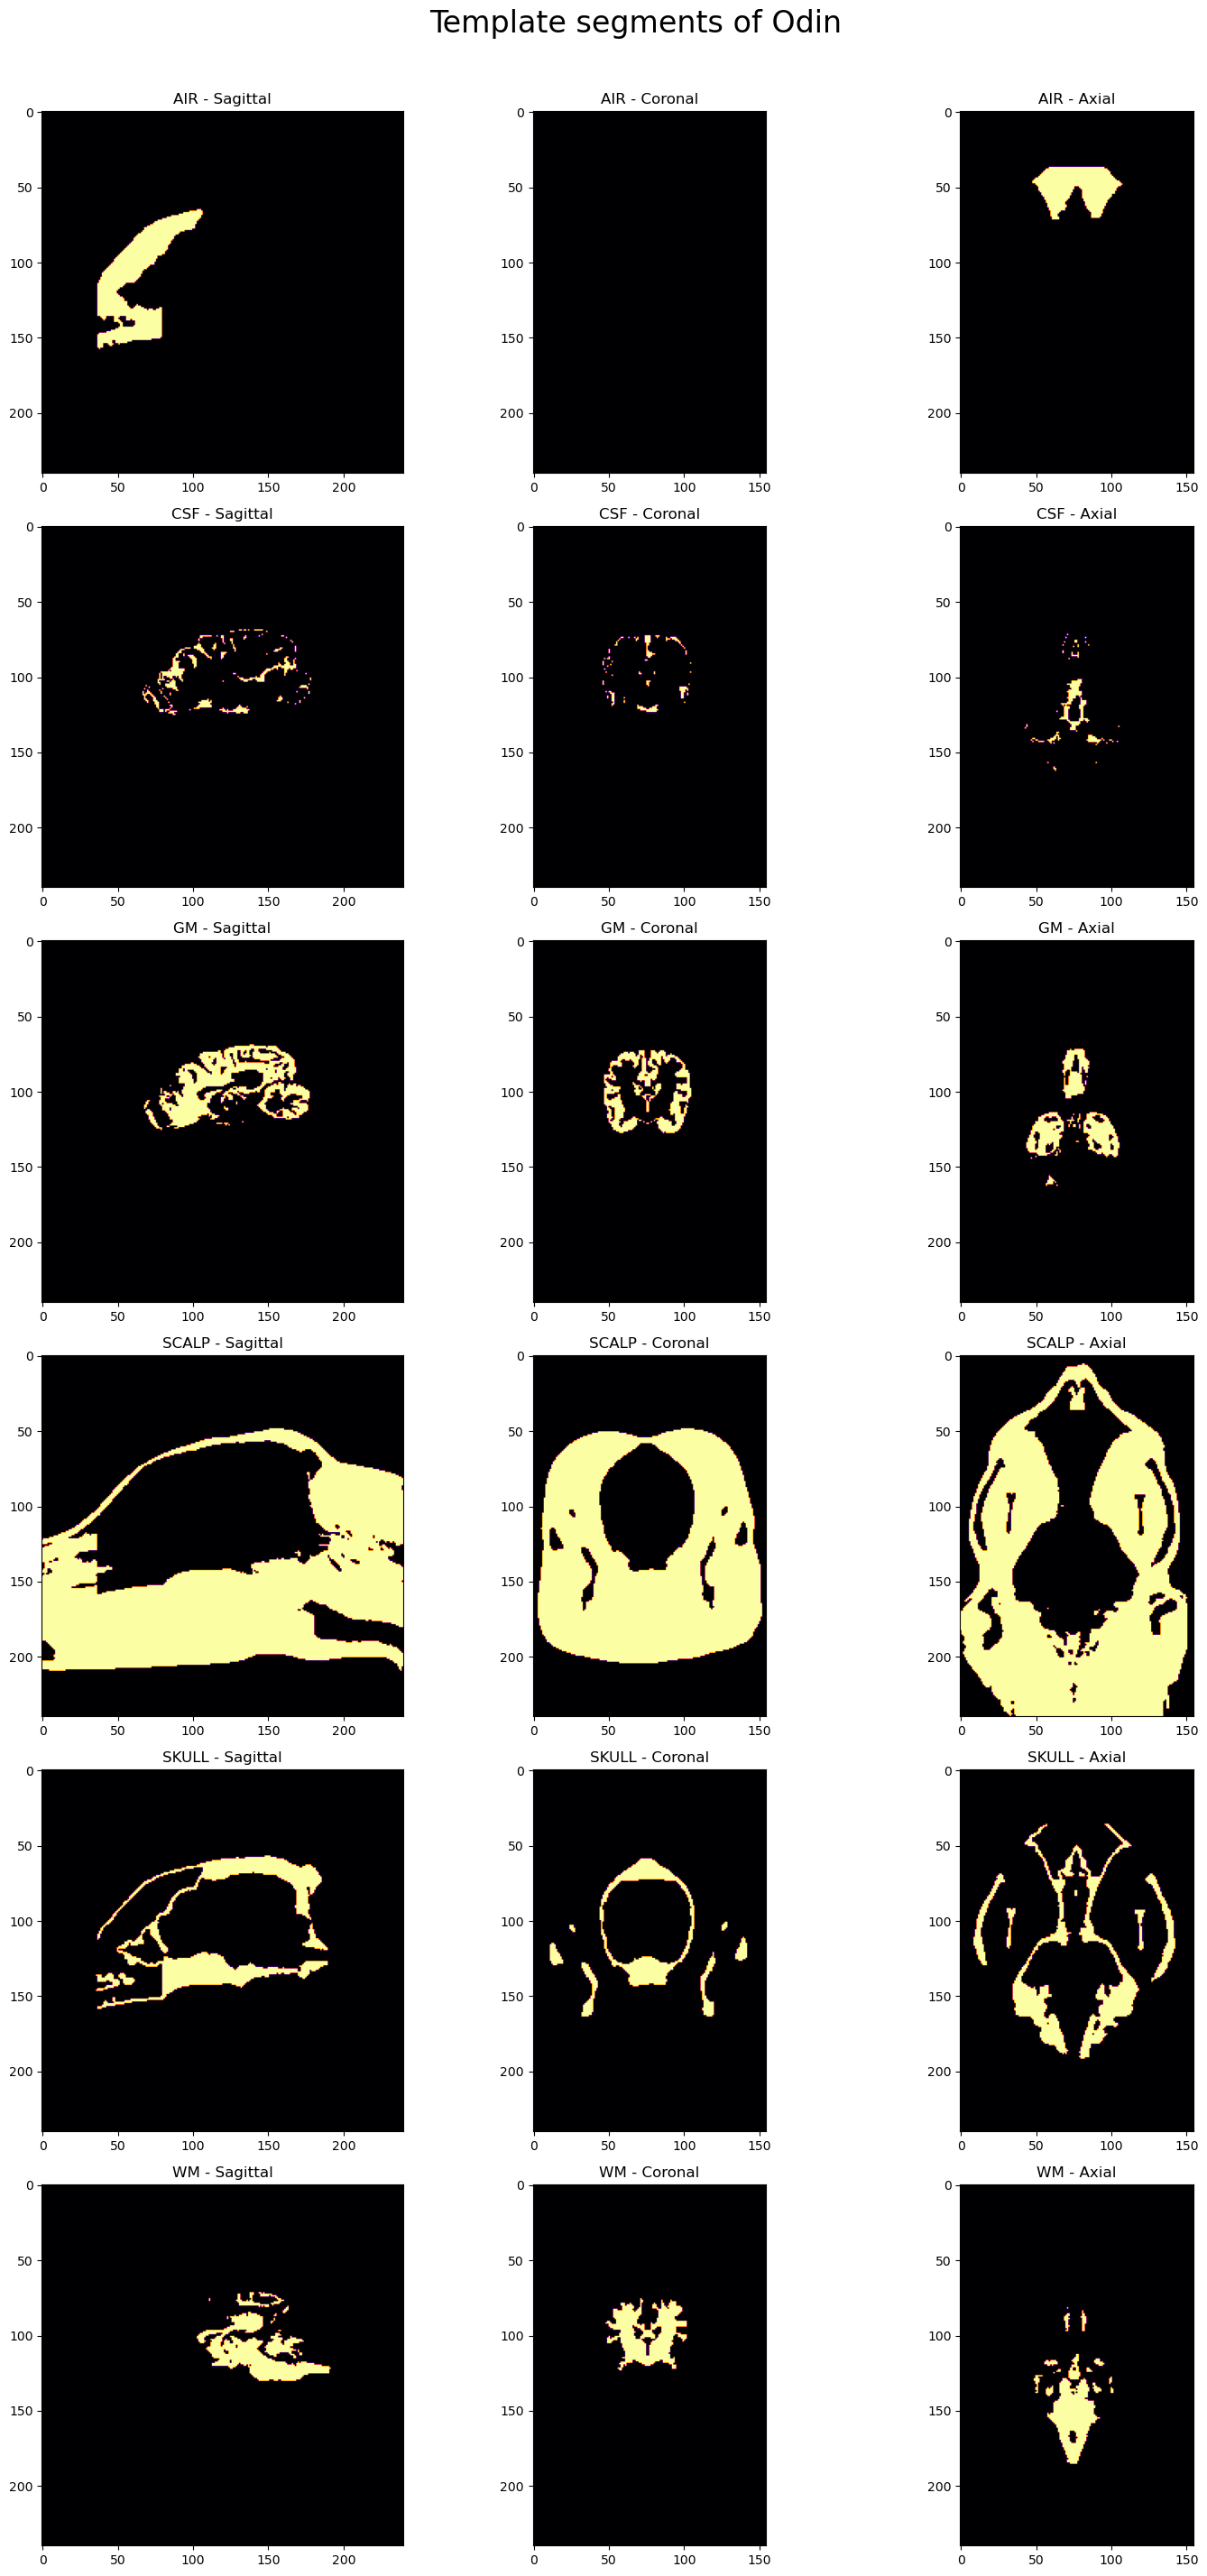

In [15]:
# Function to get the data and plot the images
def plot_nifti_data(ax, data, title):
    cmap = "inferno"
    ax[0].imshow(data[:, :, data.shape[2] // 2], cmap=cmap)
    ax[1].imshow(data[:, data.shape[1] // 2, :], cmap=cmap)
    ax[2].imshow(data[data.shape[0] // 2, :, :], cmap=cmap)
    ax[0].set_title(f'{title.upper()} - Sagittal')
    ax[1].set_title(f'{title.upper()} - Coronal')
    ax[2].set_title(f'{title.upper()} - Axial')

nifti_files = ['air', 'csf', 'gm', 'scalp', 'skull', 'wm']

# Create a subplot grid
fig, axes = plt.subplots(len(nifti_files), 3,
                figsize=(15, 5 * len(nifti_files)))

# Plot each NIFTI file
for i, file_name in enumerate(nifti_files):
    # Load the NIFTI file (change nii.gz to nii if necessary)
    img = nib.load(os.path.join(nifti_path, f'{file_name}.nii'))

    # Get the image data
    data = img.get_fdata()

    # Plot the data
    plot_nifti_data(axes[i], data, file_name)

# Add an overall title
fig.suptitle(f'Template segments of {template_name.capitalize()}',
                fontsize=24)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


## 🔨 Raw preprocessing

### ✂️ Slice the data

In [16]:
raw_freq = raw.info['sfreq']
raw_freq, raw_annotations

(12.5,
                     onset  duration description
 0 2000-01-01 00:00:03.000       0.0           s
 1 2000-01-01 00:02:28.137       0.0           e)

In [17]:
annotations = raw.annotations
if 's' in annotations.description:
    tmin = annotations.onset[annotations.description == 's'][0]
else:
    tmin = 0

if 'e' in annotations.description:
    tmax = annotations.onset[annotations.description == 'e'][0]
else:
    tmax = raw.times[-1]

# Trim the ends of the raw data
raw_cropped = raw.copy().crop(tmin=tmin, tmax=tmax)

In [18]:
annotations.onset

array([  3.   , 148.137])

In [19]:
annotations.onset[annotations.description == 'e'][0]

148.137

In [21]:
raw_cropped

<RawSNIRF | odin.snirf, 3456 x 1815 (145.1 s), ~50.5 MB, data loaded>

In [22]:
raw_cropped.get_data().shape

(3456, 1815)

### 🔄 Resample the data
Note that lowpass is Nyquist frequency. It will remain half of the frequency after resampling.

In [23]:
# Define the desired resampling rate in Hz (1 = 1 per second)
resample_rate = 1.0

# Resample the data (Do not touch)
raw_resampled = raw_cropped.resample(resample_rate, npad='auto')
raw_resampled

<RawSNIRF | odin.snirf, 3456 x 145 (144.0 s), ~6.5 MB, data loaded>

In [24]:
raw_resampled.get_data().shape

(3456, 145)

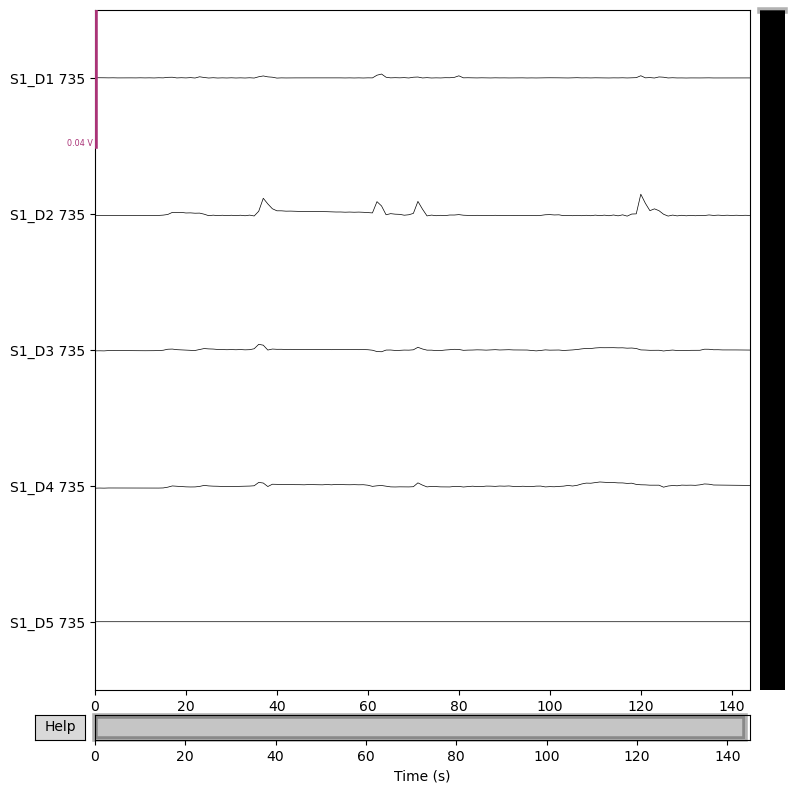

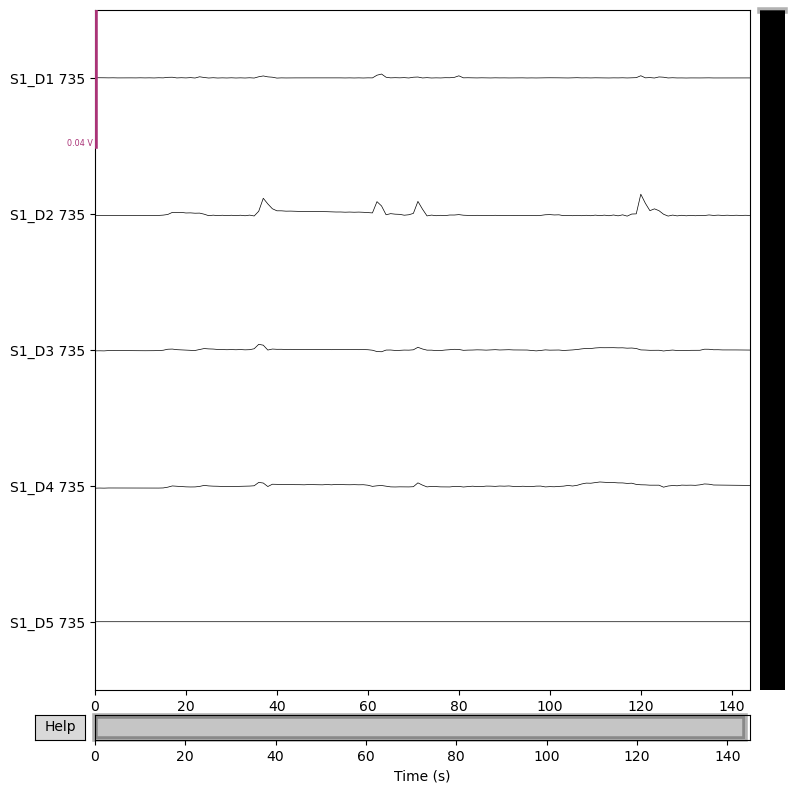

In [25]:
raw_resampled.plot(duration=600,          # Set it longer than the measurement, so you see all.
        n_channels=5,           # Look at the first 5 channels only.
        remove_dc=True)         # Remove the DC component from the data.

Note that the 'start' line is still apparent because annotations are stored as short duration intervals. There's nothing to be worry about.

## 🛝 Sandbox below this line

In [24]:
subjects_dir = op.join(mne.datasets.sample.data_path(), 'subjects')
mne.datasets.fetch_fsaverage(subjects_dir=subjects_dir)

brain = mne.viz.Brain('fsaverage', subjects_dir=subjects_dir, alpha=0.0, cortex='low_contrast', background="w")
brain.add_sensors(raw.info, trans='fsaverage', fnirs=["sources", "detectors"])
brain.show_view(azimuth=130, elevation=80, distance=700)

0 files missing from root.txt in /home/rblc/mne_data/MNE-sample-data/subjects
0 files missing from bem.txt in /home/rblc/mne_data/MNE-sample-data/subjects/fsaverage
To use light mode, "qdarkstyle" has to be installed! You can install it with:
pip install qdarkstyle

To use light mode, "qdarkstyle" has to be installed! You can install it with:
pip install qdarkstyle

Channel types::	fnirs_cw_amplitude: 3456


In [25]:
plot_kwargs = dict(subjects_dir=subjects_dir,
                   surfaces="brain", dig=True, eeg=[],
                   fnirs=['sources', 'detectors'], show_axes=True,
                   coord_frame='head', mri_fiducials=True)

fig = mne.viz.plot_alignment(trans="fsaverage", subject="fsaverage", **plot_kwargs)
set_3d_view(figure=fig, azimuth=90, elevation=0, distance=1)

To use light mode, "qdarkstyle" has to be installed! You can install it with:
pip install qdarkstyle



/tmp/ipykernel_18373/3778651853.py:6: RuntimeWarning: Digitization points not found. Cannot plot digitization.
  fig = mne.viz.plot_alignment(trans="fsaverage", subject="fsaverage", **plot_kwargs)


In [26]:
fig = mne.viz.plot_alignment(raw.info, trans="fsaverage", subject="fsaverage", **plot_kwargs)
set_3d_view(figure=fig, azimuth=90, elevation=0, distance=1)

To use light mode, "qdarkstyle" has to be installed! You can install it with:
pip install qdarkstyle

Channel types::	fnirs_cw_amplitude: 3456


In [27]:
coreg = mne.coreg.Coregistration(raw.info, "fsaverage", subjects_dir, fiducials="estimated")
coreg.fit_fiducials(lpa_weight=1., nasion_weight=1., rpa_weight=1.)

fig = mne.viz.plot_alignment(raw.info, trans=coreg.trans, subject="fsaverage", **plot_kwargs)
set_3d_view(figure=fig, azimuth=90, elevation=0, distance=1)

Using high resolution head model in /home/rblc/mne_data/MNE-sample-data/subjects/fsaverage/bem/fsaverage-head-dense.fif
    Triangle neighbors and vertex normals...
Estimating fiducials from fsaverage.
Aligning using fiducials
Start median distance:  32.53 mm
End   median distance:   7.89 mm
To use light mode, "qdarkstyle" has to be installed! You can install it with:
pip install qdarkstyle

Channel types::	fnirs_cw_amplitude: 3456


In [28]:
brain = mne.viz.Brain('fsaverage', subjects_dir=subjects_dir, background='w', cortex='0.5', alpha=0.3)
brain.add_sensors(raw.info, trans=coreg.trans, fnirs=['sources', 'detectors'])
brain.show_view(azimuth=90, elevation=90, distance=500)

To use light mode, "qdarkstyle" has to be installed! You can install it with:
pip install qdarkstyle

To use light mode, "qdarkstyle" has to be installed! You can install it with:
pip install qdarkstyle

Channel types::	fnirs_cw_amplitude: 3456


In [ ]:
mtg = raw.get_montage()
mtg.apply_trans(coreg.trans)
raw.set_montage(mtg)

<RawSNIRF | odin.snirf, 3456 x 1893 (151.4 s), ~52.6 MB, data loaded>

In [ ]:
mne_nirs.io.write_raw_snirf(raw, "raw_coregistered_to_fsaverage.snirf")

In [ ]:
raw_w_coreg = mne.io.read_raw_snirf("raw_coregistered_to_fsaverage.snirf")

# Now you can simply use `trans = "fsaverage"`.
brain = mne.viz.Brain('fsaverage', subjects_dir=subjects_dir, background='w', cortex='0.5', alpha=0.3)
brain.add_sensors(raw_w_coreg.info, trans="fsaverage", fnirs=['sources', 'detectors'])

Loading /Users/rblc/ELTE/hddotter/scripts/raw_coregistered_to_fsaverage.snirf
Channel types::	fnirs_cw_amplitude: 3456
